Quiz Title: Bitcoin Price Forecasting with ARIMA

Quiz Description:

First collect bitcoin price from 2022-01-01T00:00:00Z till 2022-12-01T23:59:59Z within 1 hour interval you can use wallex or nobitex or coinbase.com or ...

Then Your task is to use the ARIMA (AutoRegressive Integrated Moving Average) model to forecast the price of Bitcoin for a future period accoarding to data that you collected.

Question 1: Perform a visual analysis of the dataset. Plot the time series of Bitcoin prices over the 12 months.

Question 2: Before applying ARIMA, what steps would you take to make the time series stationary? Do them all

Question 3: Apply the ARIMA model to the dataset. Choose appropriate values for p, d, and q.

Question 4: Forecast the Bitcoin price for the next 3 hours using your ARIMA model.

Question 5: Evaluate the performance of your ARIMA model. Calculate and explain appropriate evaluation metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) for your forecast.

In [5]:
import json
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.stattools import adfuller

In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


symbol = 'BTCUSDT'
from_timestamp = int(datetime.datetime(year=2022,month=1,day=1).timestamp())
to_timestamp = int(datetime.datetime(2022,12,31).timestamp())

wallex = f'https://api.wallex.ir/v1/udf/history?symbol={symbol}&resolution=60&from={from_timestamp}&to={to_timestamp}'

r= requests.get(wallex)
r

<Response [200]>

In [7]:
data=r.json()
data.keys()

dict_keys(['s', 't', 'c', 'o', 'h', 'l', 'v'])

In [ ]:
df=pd.DataFrame(data,columns=['t','c','o','h','l'])

In [8]:
df.rename(columns={'t':'date_time','c':'close','o':'open','h':'high','l':'low'},inplace=True)

In [9]:
df

,date_time,close,open,high,low
0,1640984400,46850.0000000000000000,46850.0000000000000000,46850.0000000000000000,46850.0000000000000000
1,1640988000,46657.4500000000000000,47265.7000000000000000,47265.7000000000000000,46400.0000000000000000
2,1640991600,46000.0000000000000000,46100.0000000000000000,46176.7900000000000000,46000.0000000000000000
3,1640995200,45800.1100000000000000,45900.0000000000000000,45900.0000000000000000,45800.1100000000000000
4,1640998800,46146.4300000000000000,46124.8500000000000000,46155.7100000000000000,45946.2800000000000000
...,...,...,...,...,...
8586,1672416000,16568.6100000000000000,16389.6900000000000000,16568.6100000000000000,16388.6900000000000000
8587,1672419600,16568.6100000000000000,16568.6100000000000000,16568.6100000000000000,16568.6100000000000000
8588,1672423200,16560.2200000000000000,16504.1800000000000000,16566.6600000000000000,16504.1800000000000000
8589,1672426800,16568.6100000000000000,16568.6100000000000000,16568.6100000000000000,16568.6100000000000000


In [10]:
datetime.datetime.fromtimestamp(int(df['date_time'][5]))

datetime.datetime(2022, 1, 1, 5, 30)

In [11]:
df['date_time']=df['date_time'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)))

In [12]:
df

,date_time,close,open,high,low
0,2022-01-01 00:30:00,46850.0000000000000000,46850.0000000000000000,46850.0000000000000000,46850.0000000000000000
1,2022-01-01 01:30:00,46657.4500000000000000,47265.7000000000000000,47265.7000000000000000,46400.0000000000000000
2,2022-01-01 02:30:00,46000.0000000000000000,46100.0000000000000000,46176.7900000000000000,46000.0000000000000000
3,2022-01-01 03:30:00,45800.1100000000000000,45900.0000000000000000,45900.0000000000000000,45800.1100000000000000
4,2022-01-01 04:30:00,46146.4300000000000000,46124.8500000000000000,46155.7100000000000000,45946.2800000000000000
...,...,...,...,...,...
8586,2022-12-30 19:30:00,16568.6100000000000000,16389.6900000000000000,16568.6100000000000000,16388.6900000000000000
8587,2022-12-30 20:30:00,16568.6100000000000000,16568.6100000000000000,16568.6100000000000000,16568.6100000000000000
8588,2022-12-30 21:30:00,16560.2200000000000000,16504.1800000000000000,16566.6600000000000000,16504.1800000000000000
8589,2022-12-30 22:30:00,16568.6100000000000000,16568.6100000000000000,16568.6100000000000000,16568.6100000000000000


In [13]:
df.dtypes

date_time    datetime64[ns]
close                object
open                 object
high                 object
low                  object
dtype: object

In [14]:
df=df.astype({'close':'float','open':'float','high':'float','low':'float'})

In [15]:
df

,date_time,close,open,high,low
0,2022-01-01 00:30:00,46850.00,46850.00,46850.00,46850.00
1,2022-01-01 01:30:00,46657.45,47265.70,47265.70,46400.00
2,2022-01-01 02:30:00,46000.00,46100.00,46176.79,46000.00
3,2022-01-01 03:30:00,45800.11,45900.00,45900.00,45800.11
4,2022-01-01 04:30:00,46146.43,46124.85,46155.71,45946.28
...,...,...,...,...,...
8586,2022-12-30 19:30:00,16568.61,16389.69,16568.61,16388.69
8587,2022-12-30 20:30:00,16568.61,16568.61,16568.61,16568.61
8588,2022-12-30 21:30:00,16560.22,16504.18,16566.66,16504.18
8589,2022-12-30 22:30:00,16568.61,16568.61,16568.61,16568.61


In [16]:
df['year']=df['date_time'].dt.year
df['month']=df['date_time'].dt.month
df['day']=df['date_time'].dt.day

In [17]:
df

,date_time,close,open,high,low,year,month,day
0,2022-01-01 00:30:00,46850.00,46850.00,46850.00,46850.00,2022,1,1
1,2022-01-01 01:30:00,46657.45,47265.70,47265.70,46400.00,2022,1,1
2,2022-01-01 02:30:00,46000.00,46100.00,46176.79,46000.00,2022,1,1
3,2022-01-01 03:30:00,45800.11,45900.00,45900.00,45800.11,2022,1,1
4,2022-01-01 04:30:00,46146.43,46124.85,46155.71,45946.28,2022,1,1
...,...,...,...,...,...,...,...,...
8586,2022-12-30 19:30:00,16568.61,16389.69,16568.61,16388.69,2022,12,30
8587,2022-12-30 20:30:00,16568.61,16568.61,16568.61,16568.61,2022,12,30
8588,2022-12-30 21:30:00,16560.22,16504.18,16566.66,16504.18,2022,12,30
8589,2022-12-30 22:30:00,16568.61,16568.61,16568.61,16568.61,2022,12,30


## plot the data

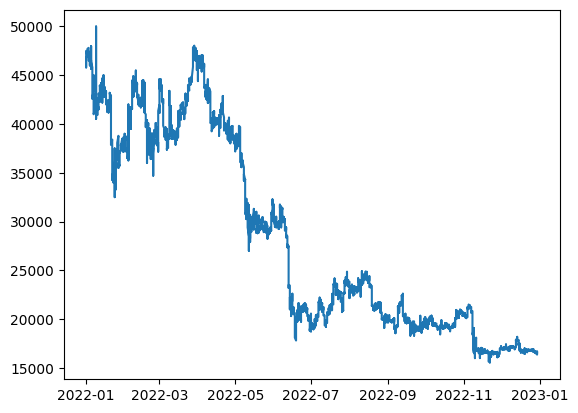

In [18]:
plt.plot(list(df['date_time'].dt.date),df['close'])

## check stationary

In [19]:
df.set_index('date_time',inplace=True)

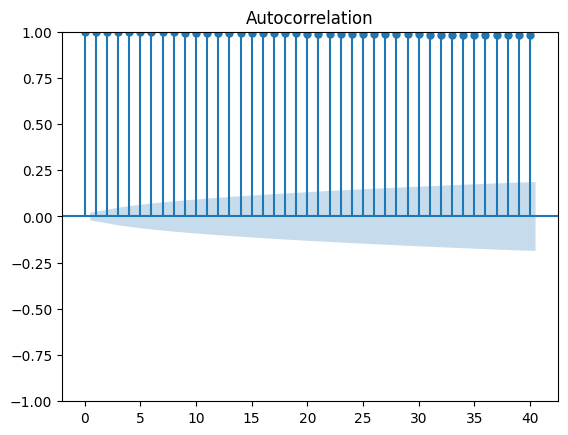

In [202]:
plot_acf(df['open']);

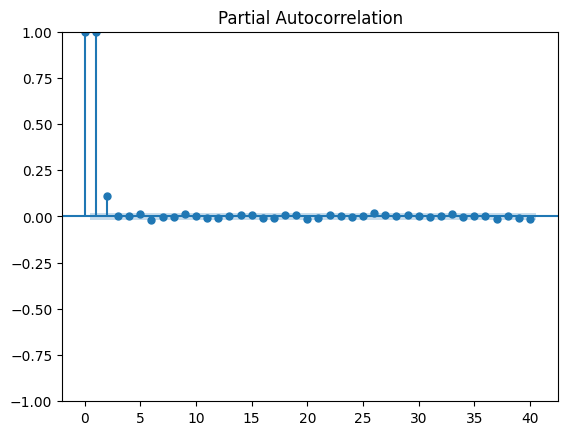

In [204]:
plot_pacf(df['open']);

In [199]:
adfuller(df['open'])

(-1.5282898821767992,
 0.5194732267960448,
 26,
 8556,
 {'1%': -3.4311145234903173,
  '5%': -2.861877867625569,
  '10%': -2.5669498420181887},
 119002.34793825878)

In [200]:
# adfuller(df['close'])
def adfuller_test(stackmarket):
    if adfuller(stackmarket)[1]>0.05:
        print('not stationary')
    else:
        print('stationary')

In [201]:
adfuller_test(df['open'])

not stationary


## stationary the dataset

In [205]:
df['first_diff']=df['open'].diff(1)

In [206]:
df

,close,open,high,low,year,month,day,first_diff,forcast
date_time,,,,,,,,,
2022-01-01 16:30:00,47400.00,47400.00,47400.00,47400.00,2022,1,1,NaN,46764.237107
2022-01-01 18:30:00,47195.29,47000.00,47195.29,47000.00,2022,1,1,-400.00,47193.622004
2022-01-01 22:30:00,47500.00,47150.00,47500.00,46929.20,2022,1,1,150.00,47192.414109
2022-01-02 00:30:00,47020.00,47500.00,47909.00,47020.00,2022,1,2,350.00,47400.619676
2022-01-02 01:30:00,47226.71,47226.71,47226.71,47226.71,2022,1,2,-273.29,47141.811657
...,...,...,...,...,...,...,...,...,...
2022-12-30 19:30:00,16568.61,16389.69,16568.61,16388.69,2022,12,30,-76.97,16420.407808
2022-12-30 20:30:00,16568.61,16568.61,16568.61,16568.61,2022,12,30,178.92,16521.185327
2022-12-30 21:30:00,16560.22,16504.18,16566.66,16504.18,2022,12,30,-64.43,16552.755147


In [207]:
adfuller_test(df['first_diff'].dropna())

stationary


#### now the data is stationary

## plot the model

In [208]:
df.dropna(inplace=True)

<Axes: xlabel='date_time'>

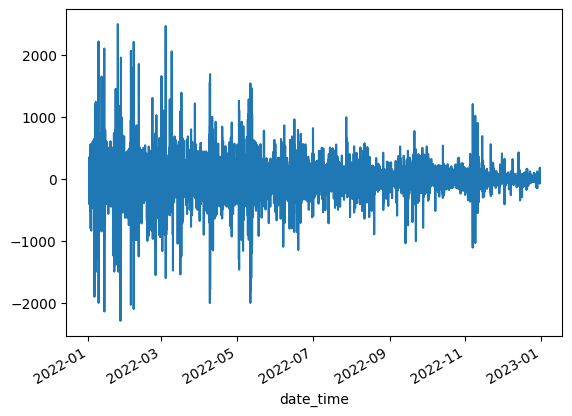

In [209]:
df['first_diff'].dropna().plot()

In [210]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

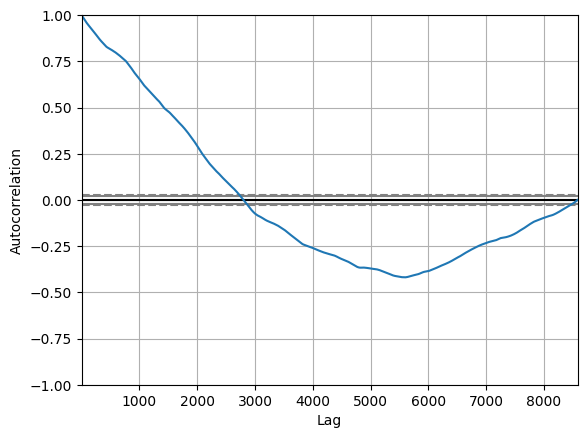

In [211]:
autocorrelation_plot(df['open'])

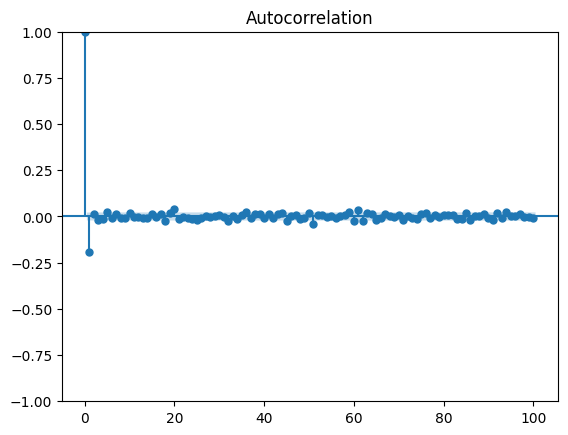

In [214]:
plot_acf(df['first_diff'],lags=100);

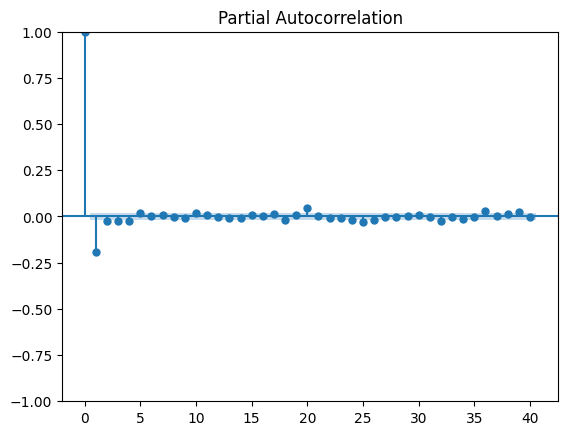

In [215]:
plot_pacf(df['first_diff']);

In [216]:
from statsmodels.tsa.arima.model import ARIMA

In [240]:
import pmdarima as pmd

In [241]:
auto_arima=pmd.auto_arima(df['open'],stepwise=False,seasonal=False)

In [242]:
auto_arima

ARIMA(order=(5, 1, 0), scoring_args={}, suppress_warnings=True)

In [250]:
# train_data=df[:8500].copy()
# test_data=df[8500:].copy

In [251]:
len(df)

8582

In [254]:
model=ARIMA(df['open'],order=(5,1,0))
model_fit=model.fit()

H:\programming\ml_basic\ML_Basic_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
H:\programming\ml_basic\ML_Basic_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
H:\programming\ml_basic\ML_Basic_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [257]:
model_fit.forecast(3)

H:\programming\ml_basic\ML_Basic_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


8582    16563.875575
8583    16567.747487
8584    16564.707744
Name: predicted_mean, dtype: float64

In [292]:
model2=ARIMA(df['open'],order=(1,1,1))
model2_fit=model2.fit()

H:\programming\ml_basic\ML_Basic_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
H:\programming\ml_basic\ML_Basic_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
H:\programming\ml_basic\ML_Basic_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [293]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   open   No. Observations:                 8582
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -59758.271
Date:                Mon, 09 Oct 2023   AIC                         119528.543
Time:                        01:56:24   BIC                         119570.886
Sample:                             0   HQIC                        119542.986
                               - 8582                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1957      0.005    -37.739      0.000      -0.206      -0.186
ar.L2         -0.0289      0.006     -5.070      0.000      -0.040      -0.018
ar.L3         -0.0277      0.006     -4.400      0.0

In [294]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   open   No. Observations:                 8582
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -59758.271
Date:                Mon, 09 Oct 2023   AIC                         119528.543
Time:                        01:56:25   BIC                         119570.886
Sample:                             0   HQIC                        119542.986
                               - 8582                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1957      0.005    -37.739      0.000      -0.206      -0.186
ar.L2         -0.0289      0.006     -5.070      0.000      -0.040      -0.018
ar.L3         -0.0277      0.006     -4.400      0.0

## forcasting with 2 models

In [295]:
model2_fit.forecast(3)

H:\programming\ml_basic\ML_Basic_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
H:\programming\ml_basic\ML_Basic_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


8582    16566.709463
8583    16566.765913
8584    16566.764237
Name: predicted_mean, dtype: float64

In [296]:
model_fit.forecast(3)

H:\programming\ml_basic\ML_Basic_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


8582    16563.875575
8583    16567.747487
8584    16564.707744
Name: predicted_mean, dtype: float64

### model1 is create with pmd.auto_arima with p=5,d=1,q=0 and model2 is create by making decision of the acf and pacf plots

In [297]:
df['forcast']=model_fit.predict()

In [298]:
df['forcast2']=model2_fit.predict()

In [299]:
df

,close,open,high,low,year,month,day,first_diff,forcast,forcast2
date_time,,,,,,,,,,
2022-01-01 18:30:00,47195.29,47000.00,47195.29,47000.00,2022,1,1,-400.00,0.000000,0.000000
2022-01-01 22:30:00,47500.00,47150.00,47500.00,46929.20,2022,1,1,150.00,46429.566838,46431.306036
2022-01-02 00:30:00,47020.00,47500.00,47909.00,47020.00,2022,1,2,350.00,47051.608002,47030.167269
2022-01-02 01:30:00,47226.71,47226.71,47226.71,47226.71,2022,1,2,-273.29,47358.325955,47411.532458
2022-01-02 03:30:00,47540.00,47540.00,47540.00,47540.00,2022,1,2,313.29,47204.825291,47265.567930
...,...,...,...,...,...,...,...,...,...,...
2022-12-30 19:30:00,16568.61,16389.69,16568.61,16388.69,2022,12,30,-76.97,16472.623747,16471.980594
2022-12-30 20:30:00,16568.61,16568.61,16568.61,16568.61,2022,12,30,178.92,16406.338083,16405.663524
2022-12-30 21:30:00,16560.22,16504.18,16566.66,16504.18,2022,12,30,-64.43,16536.817776,16536.192885


<Axes: xlabel='date_time'>

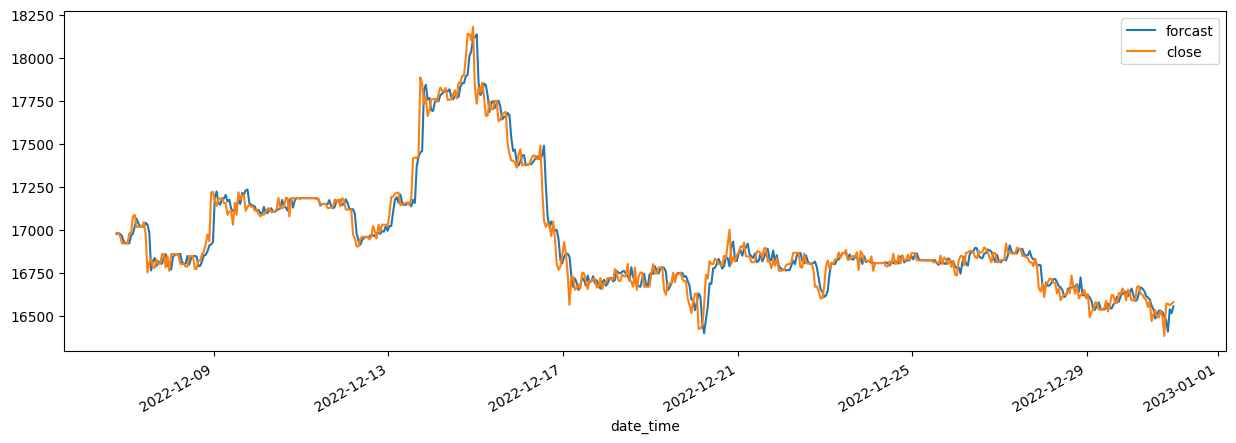

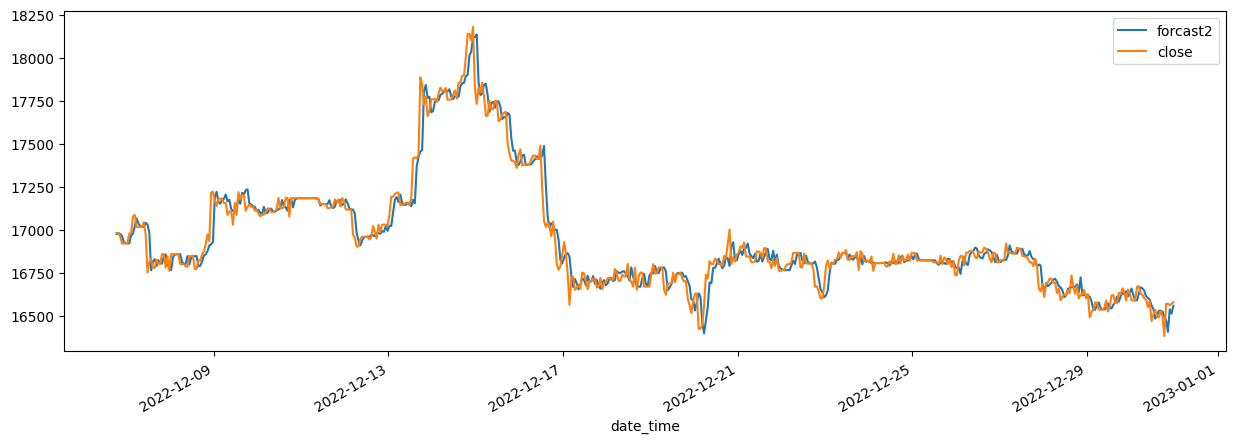

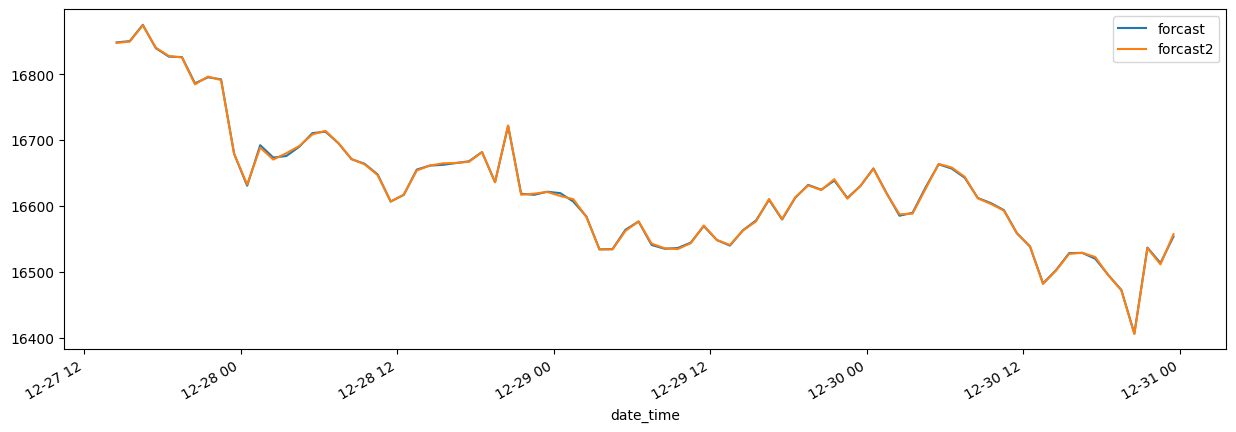

In [289]:
df[['forcast','close']][8000:].plot(figsize=(15,5))
df[['forcast2','close']][8000:].plot(figsize=(15,5))
df[['forcast','forcast2']][8500:].plot(figsize=(15,5))

In [302]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [309]:
train_data=df['open'][:int(0.8*len(df))]
test_data=df['open'][int(0.8*len(df)):]

In [321]:
test_data

date_time
2022-10-19 16:30:00    19257.58
2022-10-19 17:30:00    19115.15
2022-10-19 18:30:00    19116.01
2022-10-19 19:30:00    19116.01
2022-10-19 20:30:00    19256.57
                         ...   
2022-12-30 19:30:00    16389.69
2022-12-30 20:30:00    16568.61
2022-12-30 21:30:00    16504.18
2022-12-30 22:30:00    16568.61
2022-12-30 23:30:00    16568.61
Name: open, Length: 1717, dtype: float64

In [311]:
model_prediction=ARIMA(train_data,order=(5,1,0))
model_prediction_fit=model_prediction.fit()

H:\programming\ml_basic\ML_Basic_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
H:\programming\ml_basic\ML_Basic_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
H:\programming\ml_basic\ML_Basic_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [333]:
prediction=model_prediction_fit.forecast(len(test_data))
prediction

H:\programming\ml_basic\ML_Basic_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
H:\programming\ml_basic\ML_Basic_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


6865    19142.402358
6866    19140.549748
6867    19140.761379
6868    19144.243236
6869    19140.284330
            ...     
8577    19141.349891
8578    19141.349891
8579    19141.349891
8580    19141.349891
8581    19141.349891
Name: predicted_mean, Length: 1717, dtype: float64

In [316]:
print('model1:**********************************')
print('Mean Absolute Error of model1:',mae(test_data,prediction))
print('Mean Absolute Error of model1:',mse(test_data,prediction))

model1:**********************************
Mean Absolute Error of model1: 1955.242172224708
Mean Absolute Error of model1: 4401833.340517578


In [334]:
model_prediction2=ARIMA(train_data,order=(1,1,1))
model_prediction2_fit=model_prediction2.fit()
prediction2=model_prediction2_fit.forecast(len(test_data))


H:\programming\ml_basic\ML_Basic_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
H:\programming\ml_basic\ML_Basic_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
H:\programming\ml_basic\ML_Basic_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
H:\programming\ml_basic\ML_Basic_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index begin

In [335]:
print('model1:**********************************')
print('Mean Absolute Error of model1:',mae(test_data,prediction2))
print('Mean Absolute Error of model1:',mse(test_data,prediction2))

model1:**********************************
Mean Absolute Error of model1: 1954.4432715724388
Mean Absolute Error of model1: 4397473.909854488


## so we can see that two models are the same and not diffrensiate 